# Fashion MNIST Neural Network Architectures Exploration


## Multiclass Classifier

This Jupyter notebook builds various neural networks using Keras for the Fashion MNIST dataset. 

## Dataset

https://www.kaggle.com/zalando-research/fashionmnist


## Objective

Explore the performances of different neural network architectures on the Fashion MNIST set.

## Data Visualization

Import standard data handling and visualization libraries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

TRAIN_DATA_PATH = "fashion-mnist_train.csv"
TEST_DATA_PATH = "fashion-mnist_test.csv"

raw_train_data = pd.read_csv(TRAIN_DATA_PATH)
raw_test_data = pd.read_csv(TEST_DATA_PATH)

Ensure the training and test sets do not have missing data points and that the split is as expected (train/test 60,000/10,000).

In [2]:
print(f"Train Set Shape: {raw_train_data.shape}, Missing Data: {raw_train_data.isnull().values.any()}")
print(f"Test Set Shape: {raw_test_data.shape}, Missing Data: {raw_test_data.isnull().values.any()}\n")

print(raw_train_data.info())

raw_train_data.head(3)

Train Set Shape: (60000, 785), Missing Data: False
Test Set Shape: (10000, 785), Missing Data: False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0


A quick look at the dataset confirms the following:

1) There are 784 pixels corresponding to a 28 x 28 pixel image

2) The labels map to integers [0,9]

Let's define a function to decode the integers to be used when displaying the Fashion MNIST images.

In [3]:
def label_decoder(category):
    
    if category == 0:
        return "T-shirt/top"
    elif category == 1:
        return "Trouser"
    elif category == 2:
        return "Pullover"
    elif category == 3:
        return "Dress"
    elif category == 4:
        return "Coat"
    elif category == 5:
        return "Sandal"
    elif category == 6:
        return "Shirt"
    elif category == 7:
        return "Sneaker"
    elif category == 8:
        return "Bag"
    elif category == 9:
        return "Ankle boot"

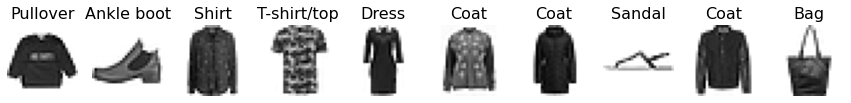

In [4]:
# create temporary DataFrames for visualization purposes
# extract the pixel map of first ten Fashion MNIST images
plot_ten_df = raw_train_data.drop("label", axis=1).iloc[0:10, :]
# extract the labels and interpret them with the function defined above for the first ten clothes
plot_ten_labels_df = raw_train_data["label"].apply(label_decoder)

# set figure size
plt.rcParams['figure.figsize'] = [15, 15]

# visualize the first 10 Fashion MNIST images in the train set 
for index in range(10):
    plt.subplot(1, 10, index+1)
    # reshape pixel arragement to 28 x 28
    clothes_array = np.asarray(plot_ten_df.iloc[index]).reshape(28, 28)
    plt.imshow(clothes_array, cmap="binary")
    plt.title(plot_ten_labels_df[index], fontsize=16)
    plt.axis("off")

## Data Splitting: Validation Set Generation

Generate a validation set to be used to control for overfitting. 

In [5]:
# separate the pixels and the label
# cast int pixels to float
X_train = np.array(raw_train_data.drop("label", axis=1))
y_train = np.array(raw_train_data["label"])

X_test = np.array(raw_test_data.drop("label", axis=1))
y_test = np.array(raw_test_data["label"])

# divide by 255.0 to normalize 
# reshape arrays to 28 x 28 to match the pixel format
X_train = (X_train / 255.0).reshape(60000, 28, 28)
X_test = (X_test / 255.0).reshape(10000, 28, 28) 

In [6]:
from sklearn.model_selection import train_test_split

# random_state=42 for reproducibility
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# verify the set sizes are as expected
print(f"X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}")
print(f"X_val Shape: {X_val.shape}, y_val Shape: {y_val.shape}")
print(f"X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}")

X_train Shape: (51000, 28, 28), y_train Shape: (51000,)
X_val Shape: (9000, 28, 28), y_val Shape: (9000,)
X_test Shape: (10000, 28, 28), y_test Shape: (10000,)


## Multilayer Perceptron (MLP)

The first model to be trained is a Multilayer Perceptron (MLP) which is a fully connected neural network. The architecture will be relatively simple but does incorporate batch normalization and dropout. Batch normalization helps mitigate for vanishing gradients and overfitting by mean subtracting the inputs and normalizing. Dropout also mitigates model overfitting by inactivating neurons at a specified probability during an epoch. Generally, these two techniques improve model generalizability but may have a reduced effect in the MLP architecture here as the neural network is relatively shallow (ex. deeper neural networks suffer from vanishing gradients more prominently).

In [7]:
import tensorflow as tf

# random_seed=42 for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# build the MLP architecture
mlp_model = tf.keras.models.Sequential([
                tf.keras.layers.Flatten(input_shape=[28, 28]),
                tf.keras.layers.Dense(300, activation="relu"),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(300, activation="relu"),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(150, activation="relu"),
                tf.keras.layers.Dense(10, activation="softmax")
])

# compile MLP model
mlp_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

# display a breakdown of the MLP model
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0

The below cell block creates a visual of the MLP.

In [8]:
# issues importing visualkeras

#import visualkeras

#print("Yellow: Flatten\nRed: Dense Layer")
#visualkeras.layered_view(mlp_model)

Let's next define some call backs to be used during model training. Notably, Early Stopping and ReduceLROnPlateau (Reduce Learning Rate on Plateau) will be used with the following initilizations:

* Early Stopping

Monitor the loss on the validation set. If it doesn't drop following 10 epochs, stop training and restore the neuron weights which gave the best performance

* ReduceLROnPlateau

Monitor the loss on the validation set. If it doesn't drop following 5 epochs, reduce the learning rate by half

Finally, the number of epochs is set to 1000 for training (which is really high) but will not matter as Early Stopping will halt the model training.

In [9]:
# define an early stopping callback, monitoring the validation cross-entropy loss function
val_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# define a performance scheduling callback, monitoring the validation cross-entropy loss function
lr_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5)

# train the MLP
mlp_training_progress = mlp_model.fit(X_train, y_train, epochs=1000, verbose=0, batch_size=128,
                                      validation_data=(X_val, y_val),
                                      callbacks=[val_stop, lr_monitor])

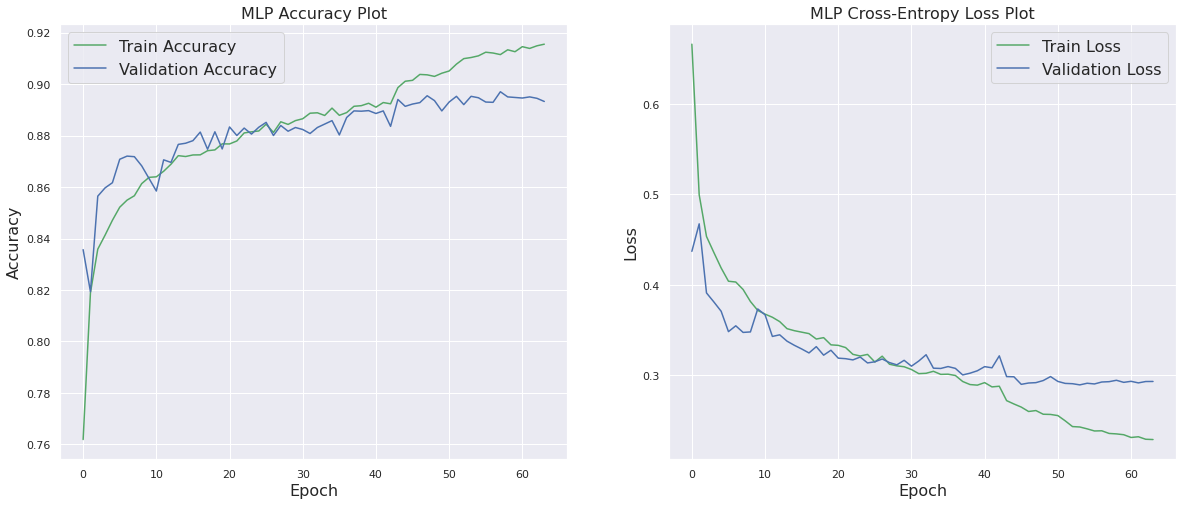

In [10]:
# define a function to plot neural network training history
def training_plots(training_progress: dict, model_name: str):
    
    sb.set_theme()
    plt.rcParams['figure.figsize'] = [20, 8]
    
    plt.subplot(1, 2, 1)
    plt.plot(training_progress["accuracy"], "g", label="Train Accuracy")
    plt.plot(training_progress["val_accuracy"], "b", label="Validation Accuracy")
    plt.title(f"{model_name} Accuracy Plot", fontsize=16)
    plt.xlabel("Epoch", fontsize=16)
    plt.ylabel("Accuracy", fontsize=16)
    plt.legend(fontsize=16)
    
    plt.subplot(1, 2, 2)
    plt.plot(training_progress["loss"], "g", label="Train Loss")
    plt.plot(training_progress["val_loss"], "b", label="Validation Loss")
    plt.title(f"{model_name} Cross-Entropy Loss Plot", fontsize=16)
    plt.xlabel("Epoch", fontsize=16)
    plt.ylabel("Loss", fontsize=16)
    plt.legend(fontsize=16)
    
training_plots(mlp_training_progress.history, "MLP")

In [11]:
mlp_test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)[1]
print(mlp_test_accuracy)

0.8985999822616577


The MLP model achieves 0.89-0.90 accuracy on the test set. Let's see if we can improve this using a Convolutional Neural Network (CNN) which is generally better at image recognition and classification.

## Convolutional Neural Network (CNN)

The second model to be trained is a general Convolutional Neural Network (CNN) which is particularly well suited for image classification tasks. In contrast to MLPs, CNNs are not fully connected. Key architecture features of CNNs include convolutional and pooling layers. Convolutional layers allow neurons to learn snapshots of an image which is placed through a filter to construct complex patterns. Finally, outputs are placed through a pooling layer which "pools" outputs together and shrinks the image to reduce computational burden. The CNN architecture used will be much deeper than the MLP earlier and therefore batch normalization and dropout become more important to mitigate vanishing gradients and overfitting.

In [12]:
from functools import partial

# random_seed=42 for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

ConvLayer = partial(tf.keras.layers.Conv2D, kernel_size=3, strides=1, activation="relu", padding="SAME")
PoolLayer = partial(tf.keras.layers.MaxPooling2D, pool_size=2, strides=2, padding="VALID")

# build the CNN architecture
cnn_model = tf.keras.models.Sequential([
                ConvLayer(filters=64, kernel_size=5, strides=2, input_shape=[28, 28, 1]),
                PoolLayer(),
                ConvLayer(filters=128),
                tf.keras.layers.BatchNormalization(),
                ConvLayer(filters=128),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.5),
                PoolLayer(),
                ConvLayer(filters=256),
                tf.keras.layers.BatchNormalization(),
                ConvLayer(filters=256),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.5),
                PoolLayer(),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(128, activation="relu"),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(64, activation="relu"),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(10, activation="softmax")
])

# compile CNN model
cnn_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

# display a breakdown of the CNN model
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)        

The below cell block creates a visual of the CNN.

In [13]:
#print("Yellow: Convolutional Layer\nRed: Max Pooling Layer\nTurquoise: Flatten\nBlue: Dense Layer\nDark Green: Dropout Layer")
#visualkeras.layered_view(cnn_model)

The pixel matrices need to be reshaped to encompass the image size (28 x 28 pixel) to feed into the CNN.

In [14]:
X_train = X_train.reshape(51000, 28, 28, 1)
X_val = X_val.reshape(9000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1) 

The CNN will be trained witht he same call backs as the MLP (Early Stopping and Reduce Learning Rate on Plateau)

In [15]:
# train the CNN
cnn_training_progress = cnn_model.fit(X_train, y_train, epochs=1000, verbose=0, batch_size=128,
                                      validation_data=(X_val, y_val),
                                      callbacks=[val_stop, lr_monitor])

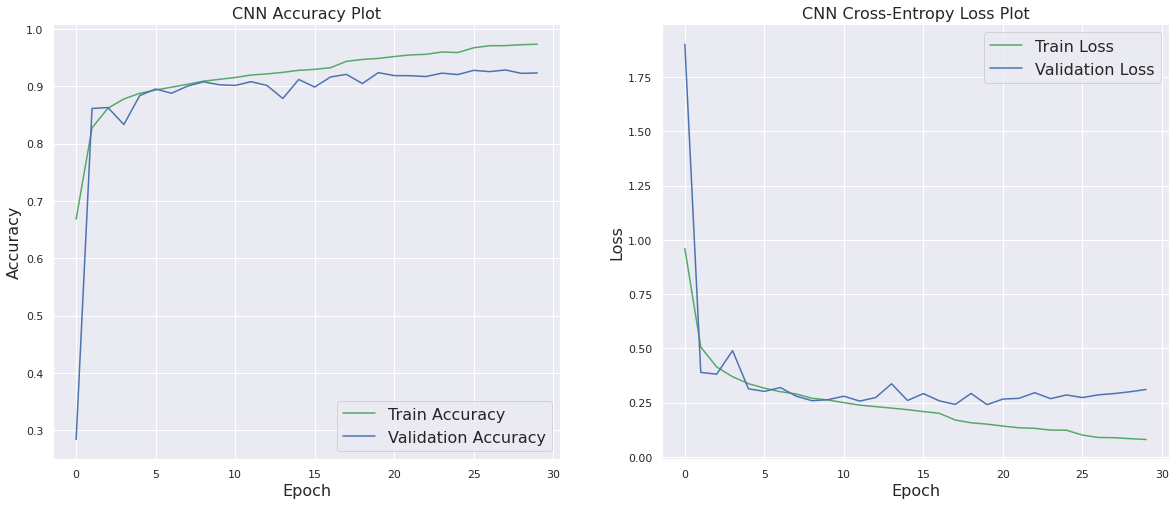

In [16]:
training_plots(cnn_training_progress.history, "CNN")

In [17]:
cnn_test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)[1]
print(cnn_test_accuracy)

0.9305999875068665


The accuracy improved! This is not a complete surprise because CNNs are better suited for the Fashion MNIST task than MLPs. Let's next explore a specific CNN architecture.

## LeNet-5 

The final model to explore is LeNet-5 which is a well known CNN architecture with historical significance. The original paper is linked below:

http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

Recently, a conference paper using LeNet-5 was submitted and cited to achieve exceptional accuracy on the Fashion MNIST dataset. The following model exploration was inspired by this paper linked below:

https://ieeexplore.ieee.org/document/9047776

The architecture follows exactly as described in the above papers.


In [18]:
# random_seed=42 for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


LeNet5ConvLayer = partial(tf.keras.layers.Conv2D, kernel_size=5, strides=1, activation="relu", padding="VALID")
LeNet5PoolLayer = partial(tf.keras.layers.AveragePooling2D, pool_size=2, strides=2, padding="VALID")

# build the LeNet-5 architecture
LeNet5_model = tf.keras.models.Sequential([
                    LeNet5ConvLayer(filters=6, input_shape=[32, 32, 1], name="C1"),
                    LeNet5PoolLayer(name="S2"),
                    LeNet5ConvLayer(filters=16, name="C3"),
                    LeNet5PoolLayer(name="S4"),
                    LeNet5ConvLayer(filters=120, name="C5"),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(84, activation="relu", name="F6"),
                    tf.keras.layers.Dense(10, activation="softmax", name="Output")                  
])

# paper uses learning rate 0.005
LeNet5_optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
# compile LeNet-5 model
LeNet5_model.compile(loss="sparse_categorical_crossentropy",
                     optimizer=LeNet5_optimizer,
                     metrics=["accuracy"])

# display a breakdown of the CNN model
LeNet5_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
S2 (AveragePooling2D)        (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (AveragePooling2D)        (None, 5, 5, 16)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
_________________________________________________________________
F6 (Dense)                   (None, 84)               

The cell block below creates a visual of LeNet-5.

In [19]:
#print("Yellow: Convolutional Layer\nRed: Average Pooling Layer\nGreen: Flatten\nBlue: Dense Layer")
#visualkeras.layered_view(LeNet5_model)

The model expands the 28 x 28 pixel to 32 x 32 pixel images. We need to adjust the feature matrices to reflect this.

In [20]:
X_train_LeNet5 = np.pad(X_train.reshape(51000, 28, 28), ((0,0), (2,2), (2,2)), "constant").reshape(51000, 32, 32, 1)
X_val_LeNet5 = np.pad(X_val.reshape(9000, 28, 28), ((0,0), (2,2), (2,2)), "constant").reshape(9000, 32, 32, 1)
X_test_LeNet5 = np.pad(X_test.reshape(10000, 28, 28), ((0,0), (2,2), (2,2)), "constant").reshape(10000, 32, 32, 1)

No call backs were used and the model was trained in 10 epochs.

In [21]:
# train the LeNet-5 CNN model
LeNet5_training_progress = LeNet5_model.fit(X_train_LeNet5, y_train, epochs=10, verbose=0, batch_size=32,
                                            validation_data=(X_val_LeNet5, y_val))

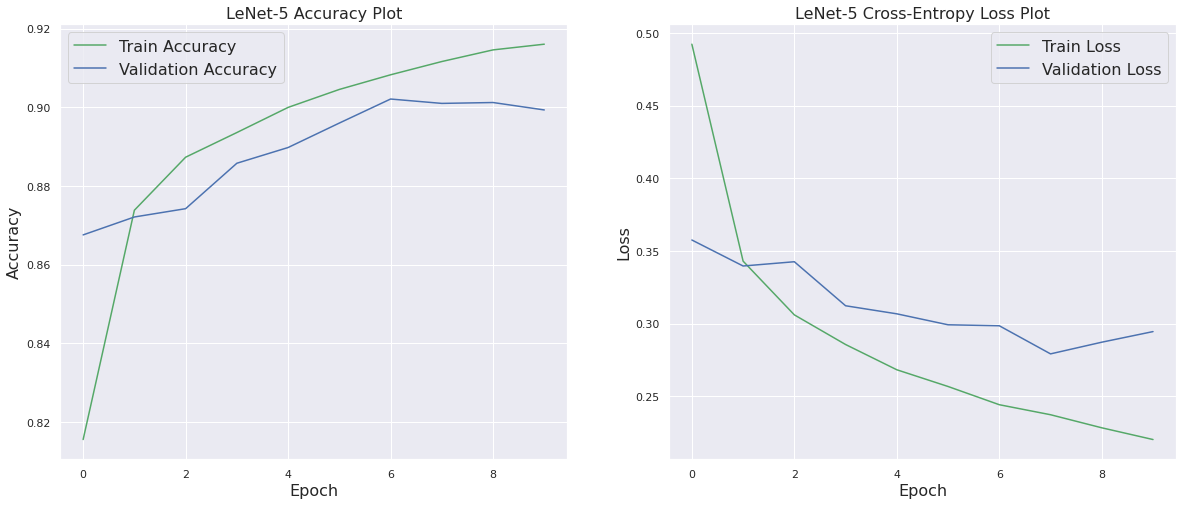

In [22]:
training_plots(LeNet5_training_progress.history, "LeNet-5")

In [23]:
LeNet5_test_accuracy = LeNet5_model.evaluate(X_test_LeNet5, y_test, verbose=0)[1]
print(LeNet5_test_accuracy)

0.9021999835968018


Unforunately, LeNet-5 doesn't seem to perform as well as the previous CNN but this is of course not conclusive as different seeds will change performance and also different data splittings.

## CNN Confusion Matrix and Performance Metrics

Finally, we will take the best performing model given the current seed/run and visualize and quantify its classification performance. Define a function to plot confusion matrices.

In [24]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_plot(model_name: str, y_test: np.array, y_pred: np.array, labels: list, plot_colour: str):

  conf_matrix = confusion_matrix(y_test, y_pred)
  sb.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap=plot_colour, cbar=False)
  
  plt.title(f"{model_name} Confusion Matrix", fontsize=18)
  plt.xlabel("Predicted Label", fontsize=14)
  plt.ylabel("True Label", fontsize=14)


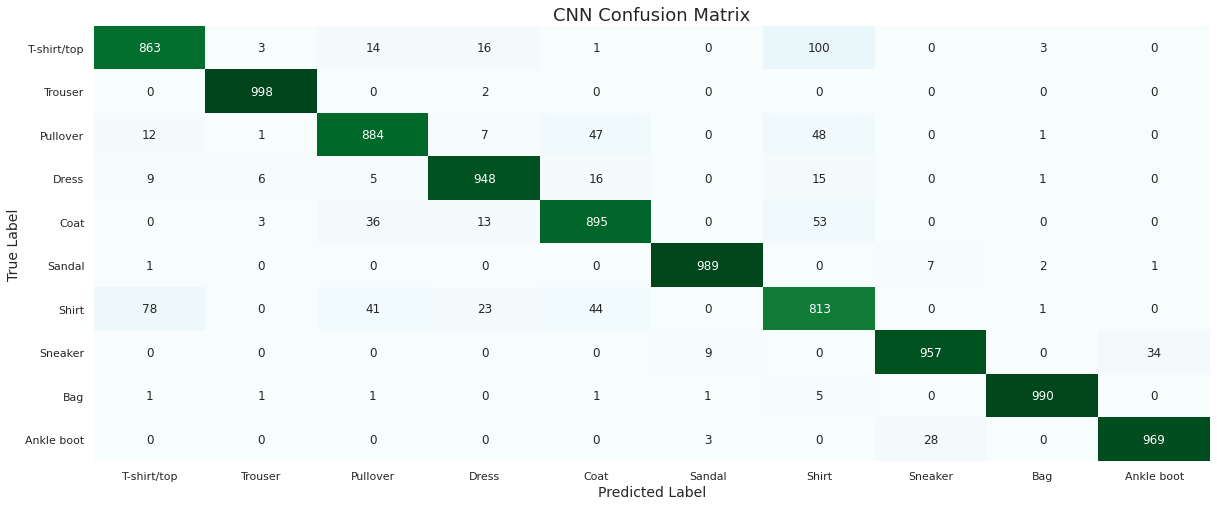

In [25]:
y_pred = cnn_model.predict(X_test)
# output is the probabilities a given Fashion MNIST clothing corresponds to each classification
# take the highest probability as the predicted classification
y_pred = np.argmax(y_pred, axis=1)

label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

confusion_matrix_plot("CNN", y_test, y_pred, label_names, "BuGn")

Let's next generate a classification report to obtain performance metrics.

In [26]:
from sklearn.metrics import classification_report

print(f" CNN Model Test Accuracy: {round(cnn_test_accuracy, 3)}\n")

print(classification_report(y_test, y_pred, target_names=label_names))

 CNN Model Test Accuracy: 0.931

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.86      0.88      1000
     Trouser       0.99      1.00      0.99      1000
    Pullover       0.90      0.88      0.89      1000
       Dress       0.94      0.95      0.94      1000
        Coat       0.89      0.90      0.89      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.79      0.81      0.80      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Referring to the confusion matrix, it is evident that the model struggles most notably in differentiating between T-shirt/top and Shirts. This is supported quantitatively by the classification report where the performance metrics fall below 0.90 only in the T-shirt/top and Shirt cases. Let's take a look at examples of each.

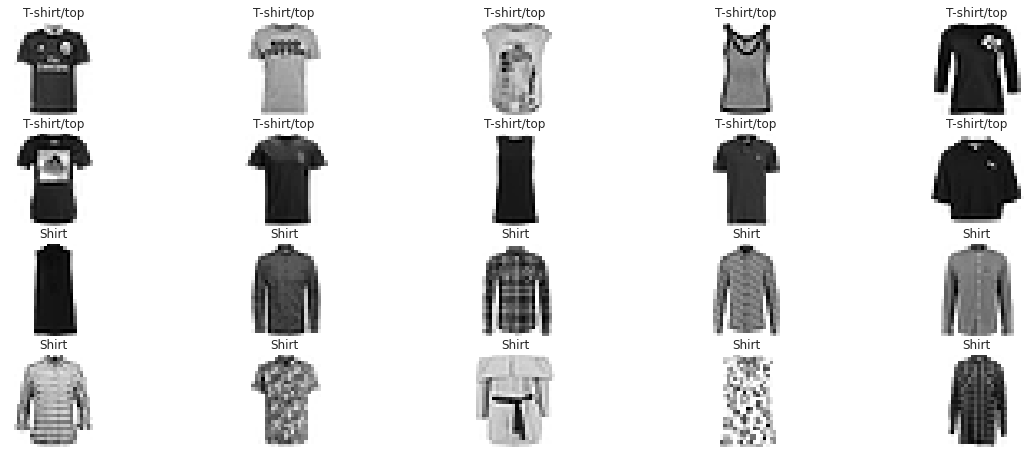

In [27]:
tshirt_top_df = raw_test_data[raw_test_data["label"] == 0].drop("label", axis=1)
shirt_df = raw_test_data[raw_test_data["label"] == 6].drop("label", axis=1)

# set figure size
plt.rcParams['figure.figsize'] = [20, 20]

fig = plt.figure()

for index in range(20):

  fig.add_subplot(10, 5, index+1)
  if index < 10:
    plt.imshow(np.asarray(tshirt_top_df.iloc[index]).reshape(28, 28), cmap="binary")
    plt.title("T-shirt/top")
  else:
    plt.imshow(np.asarray(shirt_df.iloc[index]).reshape(28, 28), cmap="binary")
    plt.title("Shirt")

  plt.axis("off")


It is interesting that T-shirts/tops can have logos in the top right corner. Moreover, they sometimes possess graphics in the middle (like a graphic t-shirt). This is in contrast to shirts which only have minimal patterns, if any, and could be exploited to enhance the precision and recall of these two categories. A potential idea is to perform some data augmentation to steer the CNN to learn using the logos and/or t-shirt graphics. 